In [1]:
import numpy as np
import pickle
import os
import re
import pandas as pd
import tqdm

import matplotlib.pyplot as plt

from scripts.run_bubblewrap import BubblewrapRun

In [2]:
run_files = []

for file in os.listdir():
    if os.path.isfile(file) and re.search("bubblewrap_run_.*\.pickle",file):
        run_files.append(file)

In [3]:
runs = []
for file in run_files:
    with open(file, "rb") as fhan:
        br = pickle.load(fhan)
        if br.bw_parameters and "seed" not in br.bw_parameters:
            br.bw_parameters["seed"] = 42
        runs.append(br)

In [78]:
# num, lam, nu, eps, B_thresh
columns = {}

for param in ["num", "nu", "lam", "eps", "B_thresh", "seed"]:
    columns[param] = [runs[x].bw_parameters[param] for x in range(len(runs))]


columns["ent1"] = [runs[x].entropy_list[-100:,0].mean() for x in range(len(runs))]
columns["ent10"] = [runs[x].entropy_list[-100:,1].mean() for x in range(len(runs))]
columns["pred1"] = [runs[x].pred_list[-100:,0].mean() for x in range(len(runs))]
columns["pred10"] = [runs[x].pred_list[-100:,1].mean() for x in range(len(runs))]
columns["time"] = [runs[x].time_to_run if hasattr(runs[x], "time_to_run") else None for x in range(len(runs))]

columns["file"] = [runs[x].file for x in range(len(runs))]
columns["run"] = runs
columns["location"] = run_files
fdf = pd.DataFrame(columns)

In [109]:
unique_files = fdf.file.unique()
unique_files

array(['./generated/lorenz_1trajectories_3dim_500to20500_noise0.05.npz',
       './generated/vdp_1trajectories_2dim_500to20500_noise0.2.npz',
       './generated/lorenz_1trajectories_3dim_500to20500_noise0.2.npz',
       './generated/vdp_1trajectories_2dim_500to20500_noise0.05.npz',
       'generated/vdp_100trajectories_2dim_500to20500_noise0.2.npz',
       'generated/vdp_1trajectories_2dim_500to20500_noise0.2.npz'],
      dtype=object)

In [104]:
df = fdf[fdf.file == unique_files[0]]

In [105]:
correlations = df.corr(numeric_only=True)
params = ["num", "nu", "lam", "eps", "B_thresh"]
metrics = ["ent1","ent10","pred1","pred10", "time"]
param_comparison = correlations.loc[params, metrics]
param_comparison

,ent1,ent10,pred1,pred10,time
num,0.479419,0.820371,0.614206,-0.111629,0.949386
nu,-0.000744,0.014677,0.024215,0.046374,0.041001
lam,-0.048973,-0.047700,-0.018634,-0.062965,-0.055963
eps,0.573448,0.291129,-0.523616,-0.610617,0.022681
B_thresh,0.380212,0.257026,-0.019321,-0.202639,0.230475


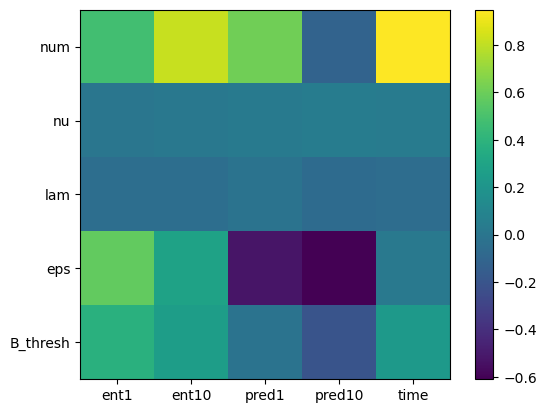

In [106]:
fig, ax = plt.subplots()
im = ax.imshow(param_comparison)
#np.convolve(np.arange(len(metrics)+1), [.5, .5])
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)

ax.set_yticks(np.arange(len(params)))
ax.set_yticklabels(params)

fig.colorbar(im)

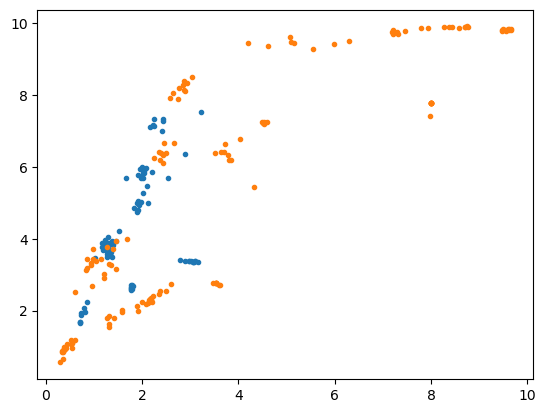

In [133]:
mask = df.eps == .0001
a = df.ent1
b = df.ent10
plt.plot(a[mask], b[mask], '.')
plt.plot(a[~mask], b[~mask], '.')

In [130]:
df

,num,nu,lam,eps,B_thresh,seed,ent1,ent10,pred1,pred10,time,file,run,location
0,1024,0.0010,0.0010,0.0001,-5,42,2.154670,7.117517,-6.093047,-12.112070,46.776133,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-19-59.pickle
2,16,0.0010,0.0010,0.0001,-15,42,0.822588,1.974006,-10.159780,-10.493128,16.526105,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-08-25-50.pickle
6,1024,0.0010,0.0001,0.0010,-10,42,2.867526,8.383525,-6.963832,-11.433135,41.378214,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-03-42.pickle
10,16,0.0010,0.0010,0.0010,-15,42,0.361579,0.840695,-10.937058,-11.063611,16.207495,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-04-23-21-43.pickle
11,1024,0.0001,0.0010,0.0010,-5,42,6.305058,9.517545,-7.644871,-11.500990,48.316343,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-10-02-16.pickle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,1024,0.0100,0.0001,0.0100,-10,42,8.741961,9.911880,-9.288745,-12.022569,42.979244,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-05-41-50.pickle
849,16,0.0100,0.0100,0.0001,-15,42,0.726606,1.871307,-10.216708,-10.486780,16.536573,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-06-59-11.pickle
850,16,0.0010,0.0001,0.0010,-15,390,0.364190,0.890838,-11.000175,-11.104077,16.223406,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-12-04-26.pickle
853,1024,0.0001,0.0100,0.0001,-5,580,2.432374,7.277180,-6.242277,-12.084297,46.838399,./generated/lorenz_1trajectories_3dim_500to205...,<scripts.run_bubblewrap.BubblewrapRun object a...,bubblewrap_run_2023-04-05-12-29-18.pickle


In [82]:
for file in df.loc[df.iloc[:,:-2].duplicated(),"location"]:
    print(f"mv {file} duplicates")